In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from scipy import stats
from scipy.stats import ttest_ind
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
df = pd.read_csv("law.csv")

In [3]:
#drop column that contains no data
df = df.drop('Rape\n(revised\ndefinition)1', axis=1)

In [4]:
#simplify column names
df.columns = ['city', 'population', 'violent crime', 'murder', 'rape', 'robbery', 'assault', 
              'property crime','burglary', 'larcent/theft', 'motor vehicle theft', 'arson']

In [5]:
#remove all commas
df = df.replace({',': ''}, regex=True)

#convert all data into floats
df[['population', 'violent crime', 'murder', 'rape', 'robbery', 'assault', 
              'property crime','burglary', 'larcent/theft', 'motor vehicle theft', 'arson']] = df[['population', 'violent crime', 'murder', 'rape', 'robbery', 'assault', 
              'property crime','burglary', 'larcent/theft', 'motor vehicle theft', 'arson']].astype(float)

In [6]:
df.head()

,city,population,violent crime,murder,rape,robbery,assault,property crime,burglary,larcent/theft,motor vehicle theft,arson
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,1.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


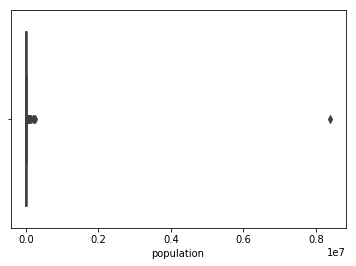

In [7]:
#check for outliers
sns.boxplot(df['population'])
plt.show()

In [8]:
#remove outliers (based off of 3 standard deviations)
df[np.abs(df.population-df.population.mean())<=(3*df.population.std())] 
df = df[~(np.abs(df.population-df.population.mean())>(3*df.population.std()))]

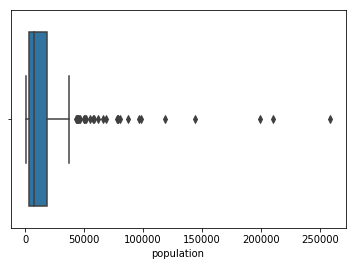

In [9]:
sns.boxplot(df['population'])
plt.show()

In [14]:
features = df[['city', 'property crime', 'population']]

In [15]:
#diable warning
pd.options.mode.chained_assignment = None

#create population squared column
features['population_squared'] = np.square(df['population'])

In [16]:
#convert murder and robbery columns into features['murder'] = np.where(df['murder']>0, 1, 0)
features['robbery'] = np.where(df['robbery']>0, 1, 0)

In [17]:
features.head()

,city,property crime,population,population_squared,murder,robbery
0,Adams Village,12.0,1861.0,3.463321e+06,0,0
1,Addison Town and Village,24.0,2577.0,6.640929e+06,0,0
2,Akron Village,16.0,2846.0,8.099716e+06,0,0
3,Albany,1.0,97956.0,9.595378e+09,1,1
4,Albion Village,223.0,6388.0,4.080654e+07,0,1
